In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import Adam 
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import keras_tuner as kt
from tensorflow.keras import layers

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn
import pandas

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline

In [28]:
filepath = "datasets/wine_with_types.csv"
df = pd.read_csv(filepath)
df = df.sample(frac=1, random_state = 42, ignore_index=True)

In [29]:
X = df.drop("quality", axis=1)
y = df["quality"]
y = np.asarray(y).astype('int32').reshape((-1,1))
y.shape
X.shape

(6497, 12)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 10, shuffle=True)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(20, input_dim=12, kernel_initializer='normal', activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_11 (Dense)             (None, 20)                2580      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 4,265
Trainable params: 4,265
Non-trainable params: 0
_________________________________________________________________


In [47]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

In [48]:
history = NN_model.fit(X_train, y_train, epochs=250, batch_size=5, validation_split = 0.2, callbacks=stop_early)

Epoch 1/250
728/728 [==============================] - 1s 1ms/step - loss: 1.1291 - mean_absolute_error: 1.1291 - val_loss: 0.6336 - val_mean_absolute_error: 0.6336
Epoch 2/250
728/728 [==============================] - 1s 1ms/step - loss: 0.6271 - mean_absolute_error: 0.6271 - val_loss: 0.6396 - val_mean_absolute_error: 0.6396
Epoch 3/250
728/728 [==============================] - 1s 1ms/step - loss: 0.6017 - mean_absolute_error: 0.6017 - val_loss: 0.5831 - val_mean_absolute_error: 0.5831
Epoch 4/250
728/728 [==============================] - 1s 1ms/step - loss: 0.5974 - mean_absolute_error: 0.5974 - val_loss: 0.6300 - val_mean_absolute_error: 0.6300
Epoch 5/250
728/728 [==============================] - 1s 1ms/step - loss: 0.5950 - mean_absolute_error: 0.5950 - val_loss: 0.5730 - val_mean_absolute_error: 0.5730
Epoch 6/250
728/728 [==============================] - 1s 1ms/step - loss: 0.5903 - mean_absolute_error: 0.5903 - val_loss: 0.5925 - val_mean_absolute_error: 0.5925
Epoch 7/25

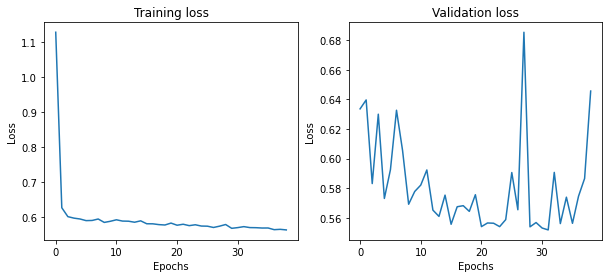

In [49]:
loss = history.history['loss']
# accuracy = history.history['accuracy']

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
plt.plot(history.history['val_loss'])
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].set(xlabel="Epochs", ylabel="Loss", title="Validation loss")

# axs[1].plot(range(len(accuracy)), accuracy)
# axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
# plt.plot(history.history['val_accuracy'])

plt.show()

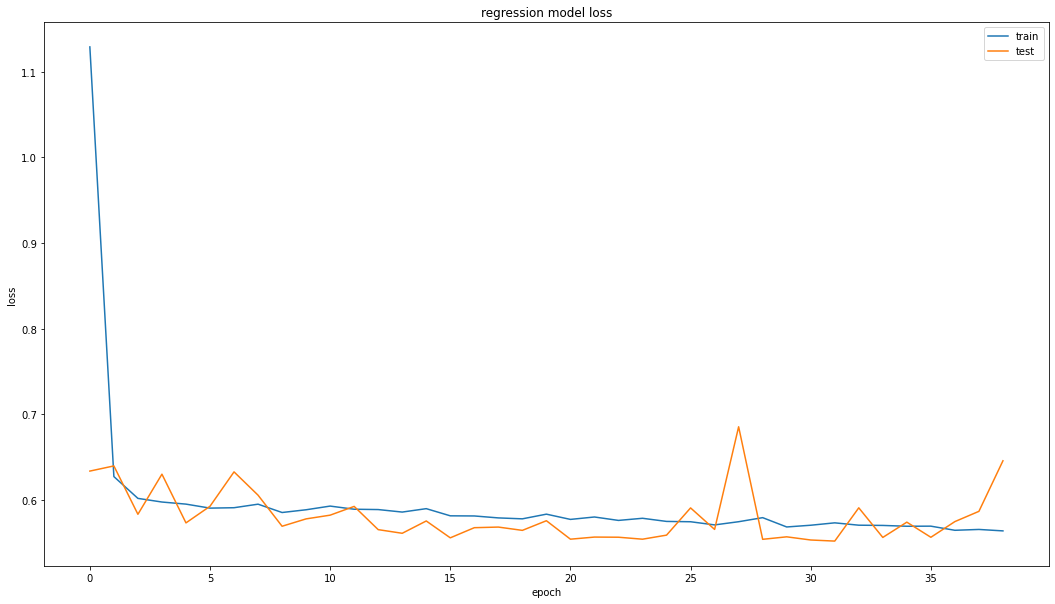

In [50]:
plt.figure(figsize=(18, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('regression model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [51]:
# make class predictions for the testing set
y_pred_reg = NN_model.predict(X_test)
y_pred_reg_rounded = np.around(y_pred_reg)
y_pred_reg_rounded

array([[6.],
       [6.],
       [8.],
       ...,
       [7.],
       [6.],
       [6.]], dtype=float32)

In [52]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_reg_rounded))

0.4641025641025641


In [42]:
from sklearn.metrics import mean_squared_error
print(metrics.mean_squared_error(y_test, y_pred_reg_rounded))

0.5902564102564103


In [43]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
cm = metrics.confusion_matrix(y_test, y_pred_reg_rounded)
print(cm)

[[  0   2   3   4   0   0   0]
 [  0   6  45  13   1   0   0]
 [  0  14 447 180   1   0   0]
 [  0   1 239 551  60   0   0]
 [  0   0  18 217  89   0   0]
 [  0   0   3  40  14   1   0]
 [  0   0   0   0   1   0   0]]


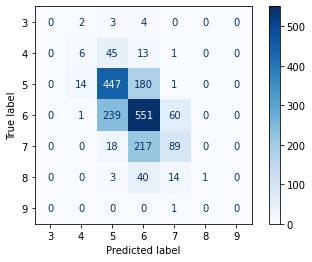

In [44]:
labels = ['3',"4","5","6","7","8","9"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()